In [1]:
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
c = ("/content/moved_same_state.csv")
v = ("/content/moved_between_states.csv")

In [31]:
control = pd.read_csv(c)
variant = pd.read_csv(v)

control.head()
variant.head()

,Geography ID,Census Tract,State,County,Region,Division,Total Population,Total U.S. Citizens (Native),Total U.S. Citizens (Naturalized),Total Non-Citizens,Married,Never Married,Separated,Divorced,Widowed,Less than a High School Graduate,High School Graduate (or its Equivalency),Some College or Associate's Degree,Bachelor's Degree,Graduate or Professional Degree
0,1400000US01001020100,201.00,Alabama,Autauga County,South,East South Central,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1400000US01001020200,202.00,Alabama,Autauga County,South,East South Central,0.4,0.4,NaN,NaN,0.4,0.0,1.4,0.0,0.0,5.4,0.0,0.0,0.0,0.0
2,1400000US01001020300,203.00,Alabama,Autauga County,South,East South Central,2.4,2.4,NaN,0.0,3.0,1.1,0.0,14.5,0.0,0.0,8.4,2.3,0.0,0.0
3,1400000US01001020400,204.00,Alabama,Autauga County,South,East South Central,1.7,1.8,0.0,0.0,1.6,0.0,2.6,0.0,0.0,0.0,3.1,0.0,1.2,5.3
4,1400000US01001020501,205.01,Alabama,Autauga County,South,East South Central,3.2,3.5,0.0,0.0,3.6,9.4,1.6,0.0,3.5,0.0,0.0,11.7,5.1,0.0


#Data Overview

####Data is loaded into `control` and `variant` for analysis.
####Checking for missing values in both datasets
##### Displaying key summary statistics for a few columns in the control dataset to better understand the distribution

In [32]:
# Data Overview and Quality Assessment
print("=== DATA OVERVIEW ===")
print(f"Control dataset shape: {control.shape}")
print(f"Variant dataset shape: {variant.shape}")

print("\n=== MISSING VALUES ===")
print("Control missing values:")
print(control.isnull().sum()[control.isnull().sum() > 0])

print("\n=== DESCRIPTIVE STATISTICS ===")
print(control[['Total Population', 'Never Married', 'Married']].describe())

print("\n=== UNIQUE VALUES ===")
print(f"Unique states in control: {control['State'].nunique()}")
print(f"Unique counties in control: {control['County'].nunique()}")

=== DATA OVERVIEW ===
Control dataset shape: (85396, 20)
Variant dataset shape: (85396, 20)

=== MISSING VALUES ===
Control missing values:
Region                                        981
Division                                      981
Total Population                             1779
Total U.S. Citizens (Native)                 1781
Total U.S. Citizens (Naturalized)            6964
Total Non-Citizens                           9548
Married                                      1779
Never Married                                1821
Separated                                    1875
Divorced                                     1971
Widowed                                      2767
Less than a High School Graduate             2804
High School Graduate (or its Equivalency)    1961
Some College or Associate's Degree           1876
Bachelor's Degree                            2014
Graduate or Professional Degree              2596
dtype: int64

=== DESCRIPTIVE STATISTICS ===
       Total Po

#Unique Values
#### Examining the uniqueness of states and counties in the control dataset to understand the data's diversity.


In [4]:
county = pd.DataFrame()
state = pd.DataFrame()
division = pd.DataFrame()
region = pd.DataFrame()

#Data Visualization Setup
#### Preparing for visual analysis using matplotlib and seaborn for plotting distribution and correlation graphs.
#### Visualizing the distribution of within-state and between-state relocations using histograms. Helps understand how relocation is spread.
####Plotting a scatter plot to compare the relationship between relocations within and between states.


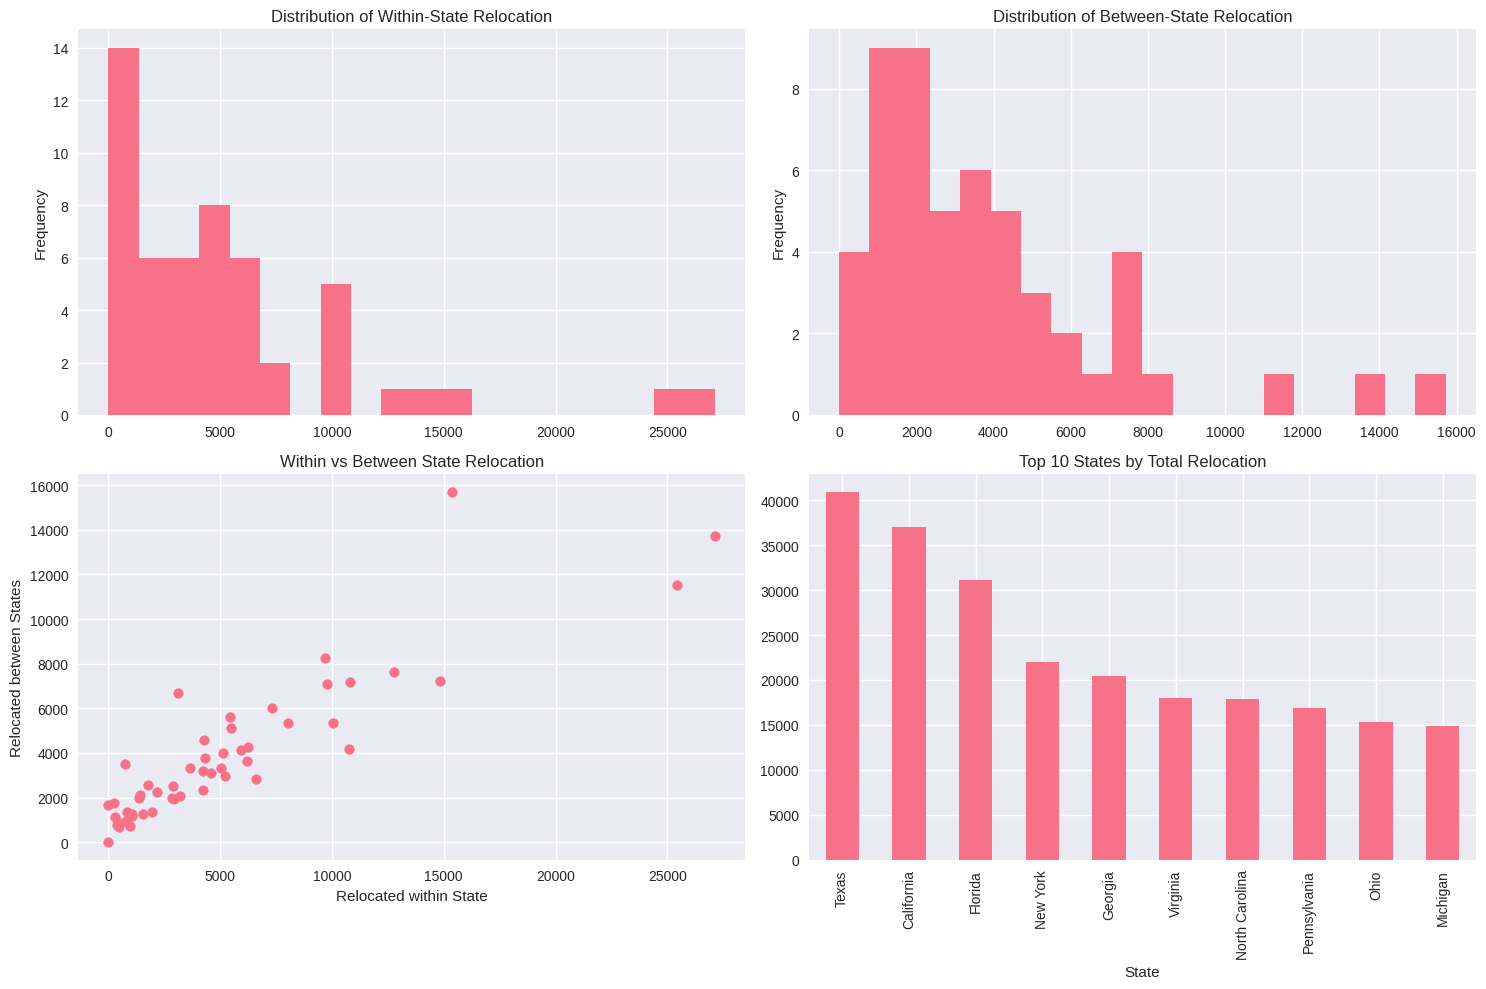

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Distribution plots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Population distribution by state
state['Relocated within State'].plot(kind='hist', bins=20, ax=axes[0,0], title='Distribution of Within-State Relocation')
state['Relocated between States'].plot(kind='hist', bins=20, ax=axes[0,1], title='Distribution of Between-State Relocation')

# Comparison plot
axes[1,0].scatter(state['Relocated within State'], state['Relocated between States'])
axes[1,0].set_xlabel('Relocated within State')
axes[1,0].set_ylabel('Relocated between States')
axes[1,0].set_title('Within vs Between State Relocation')

# Top 10 states by total relocation
total_relocation = state['Relocated within State'] + state['Relocated between States']
total_relocation.nlargest(10).plot(kind='bar', ax=axes[1,1], title='Top 10 States by Total Relocation')

plt.tight_layout()
plt.show()

In [5]:
state["Relocated within State"] = control.groupby("State")["Total Population"].sum()
state["Relocated between States"] = variant.groupby("State")["Total Population"].sum()

state.head()

,Relocated within State,Relocated between States
State,,
Alabama,4230.3,3191.1
Alaska,469.6,700.9
Arizona,3102.0,6677.5
Arkansas,2946.8,1934.1
California,25451.9,11529.7


In [6]:
cny = state.loc[["California", "New York"]]

cny

,Relocated within State,Relocated between States
State,,
California,25451.9,11529.7
New York,14816.3,7206.8


In [7]:
t_stat, p_value = stats.ttest_ind(cny["Relocated within State"], cny["Relocated between States"])

print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: 1.875490757035505
p-value: 0.20155480459249206


#T-test Analysis
#### Running a t-test to check if the difference in relocation between states for California and New York is statistically significant.
####Analyzing the correlation between within-state and between-state relocations to see if there is any linear relationship.


In [34]:
# Correlation analysis
print("=== CORRELATION ANALYSIS ===")
mobility_data = pd.DataFrame({
    'Within_State': state['Relocated within State'],
    'Between_States': state['Relocated between States']
})

correlation = mobility_data.corr()
print(correlation)

# Normality tests
from scipy.stats import shapiro

print("\n=== NORMALITY TESTS ===")
stat_within, p_within = shapiro(state['Relocated within State'])
stat_between, p_between = shapiro(state['Relocated between States'])

print(f"Within State - Shapiro-Wilk test: statistic={stat_within:.4f}, p-value={p_within:.4f}")
print(f"Between States - Shapiro-Wilk test: statistic={stat_between:.4f}, p-value={p_between:.4f}")

# Effect size calculation (Cohen's d)
def cohens_d(group1, group2):
    n1, n2 = len(group1), len(group2)
    pooled_std = np.sqrt(((n1-1)*group1.std()**2 + (n2-1)*group2.std()**2) / (n1+n2-2))
    return (group1.mean() - group2.mean()) / pooled_std

effect_size = cohens_d(cny["Relocated within State"], cny["Relocated between States"])
print(f"\nEffect size (Cohen's d): {effect_size:.4f}")

=== CORRELATION ANALYSIS ===
                Within_State  Between_States
Within_State        1.000000        0.893481
Between_States      0.893481        1.000000

=== NORMALITY TESTS ===
Within State - Shapiro-Wilk test: statistic=0.7749, p-value=0.0000
Between States - Shapiro-Wilk test: statistic=0.8284, p-value=0.0000

Effect size (Cohen's d): 1.8755


In [10]:
d = control[(control["State"] == "California") | (variant["State"] == "New York")]

cny2 = pd.DataFrame()
cny2["Total U.S. Citizens (Naturalized)"] = d.groupby("State")["Total U.S. Citizens (Naturalized)"].sum()
cny2["Total Non-Citizens"] = d.groupby("State")["Total Non-Citizens"].sum()

cny2

,Total U.S. Citizens (Naturalized),Total Non-Citizens
State,,
California,20972.7,28069.4
New York,13930.0,19412.7


In [11]:
t_stat, p_value = stats.ttest_ind(cny2["Total U.S. Citizens (Naturalized)"], cny2["Total Non-Citizens"])

print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: -1.1272204191762456
p-value: 0.37670532983767413


#Citizenship Analysis
#### Comparing the mobility between naturalized U.S. citizens and non-citizens in California and New York using a t-test.


In [35]:
# Regional comparison
region_analysis = pd.DataFrame()
region_analysis["Within State"] = control.groupby("Region")["Total Population"].sum()
region_analysis["Between States"] = variant.groupby("Region")["Total Population"].sum()
region_analysis["Total"] = region_analysis["Within State"] + region_analysis["Between States"]
region_analysis["Mobility Rate"] = region_analysis["Between States"] / region_analysis["Total"] * 100

print("=== REGIONAL MOBILITY ANALYSIS ===")
print(region_analysis.sort_values('Mobility Rate', ascending=False))

=== REGIONAL MOBILITY ANALYSIS ===
           Within State  Between States     Total  Mobility Rate
Region                                                          
West            52936.2         47543.2  100479.4      47.316365
South          115574.4         85939.5  201513.9      42.646934
Northeast       40109.5         29208.9   69318.4      42.137297
Midwest         62813.7         36197.2   99010.9      36.558803


In [12]:
cny3 = pd.DataFrame()
cny3["Total U.S. Citizens (Native)"] = d.groupby("State")["Total U.S. Citizens (Native)"].sum()
cny3["Total U.S. Citizens (Naturalized)"] = cny2["Total U.S. Citizens (Naturalized)"]

cny3

,Total U.S. Citizens (Native),Total U.S. Citizens (Naturalized)
State,,
California,26749.0,20972.7
New York,15311.4,13930.0


In [13]:
t_stat, p_value = stats.ttest_ind(cny3["Total U.S. Citizens (Native)"], cny3["Total U.S. Citizens (Naturalized)"])

print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: 0.5328846105405418
p-value: 0.6473950862457037


In [14]:
region["High School Graduate (or its Equivalency)"] = control.groupby("Region")["High School Graduate (or its Equivalency)"].sum()
region["Bachelor's Degree"] = control.groupby("Region")["Bachelor's Degree"].sum()

nem = region.loc[region.index.isin(['Northeast', 'South'])]
nem

,High School Graduate (or its Equivalency),Bachelor's Degree
Region,,
Northeast,31270.3,40102.8
South,99030.9,104020.9


#Education Mobility Calculation
####Summing the educational attainment data for each state and storing it in `education_mobility` for further analysis.


In [15]:
t_stat, p_value = stats.ttest_ind(nem["High School Graduate (or its Equivalency)"], nem["Bachelor's Degree"])

print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: -0.14838883965105612
p-value: 0.8956461212363281


In [36]:
# Age group analysis (check what age columns exist first)
age_columns = [col for col in control.columns if any(age in col.lower() for age in ['under', 'over', 'years', 'age'])]
print("Available age-related columns:", age_columns)

# Education vs mobility analysis
education_mobility = pd.DataFrame()
education_cols = ['High School Graduate (or its Equivalency)', "Bachelor's Degree"]

for col in education_cols:
    if col in control.columns:
        education_mobility[col] = control.groupby("State")[col].sum()

# Calculate education mobility rates
total_pop_by_state = control.groupby("State")["Total Population"].sum()
for col in education_mobility.columns:
    education_mobility[f"{col}_Rate"] = (education_mobility[col] / total_pop_by_state * 100)

print("=== EDUCATION-BASED MOBILITY RATES ===")
print(education_mobility.head(10))

Available age-related columns: []
=== EDUCATION-BASED MOBILITY RATES ===
                      High School Graduate (or its Equivalency)  \
State                                                             
Alabama                                                  3226.3   
Alaska                                                    502.6   
Arizona                                                  2561.1   
Arkansas                                                 2361.1   
California                                              20389.6   
Colorado                                                 6440.4   
Connecticut                                              1643.0   
Delaware                                                  233.9   
District of Columbia                                        0.0   
Florida                                                 12580.4   

                      Bachelor's Degree  \
State                                     
Alabama                          341

#Marital Status Comparison by Region
#### Comparing the marital status between two regions (South Atlantic vs Mountain) using a t-test to identify if there are significant differences.


In [16]:
division["Never Married"] = control.groupby("Division")["Never Married"].sum()
division["Married"] = control.groupby("Division")["Married"].sum()

sam = division.loc[division.index.isin(['South Atlantic', 'Mountain'])]

sam

,Never Married,Married
Division,,
Mountain,26106.5,18036.4
South Atlantic,82821.1,59658.2


In [17]:
t_stat, p_value = stats.ttest_ind(sam["Never Married"], sam["Married"])

print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: 0.4439749639053858
p-value: 0.7004755993837322


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Prepare data for modeling
model_data = state.copy()
model_data['Total_Relocation'] = model_data['Relocated within State'] + model_data['Relocated between States']
model_data['Mobility_Ratio'] = model_data['Relocated between States'] / model_data['Relocated within State']

# Add demographic features
demo_features = control.groupby('State')[['Never Married', 'Married', 'Divorced',
                                          'Total U.S. Citizens (Naturalized)',
                                          'Total Non-Citizens']].sum()

model_data = model_data.join(demo_features)

# Simple regression model
X = model_data[['Never Married', 'Married', 'Total U.S. Citizens (Naturalized)']]
y = model_data['Mobility_Ratio']

# Remove any infinite or NaN values
mask = np.isfinite(X).all(axis=1) & np.isfinite(y)
X_clean = X[mask]
y_clean = y[mask]

if len(X_clean) > 10:  # Only run if we have enough data
    X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.3, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    print(f"=== PREDICTIVE MODEL RESULTS ===")
    print(f"R² Score: {r2:.4f}")
    print(f"MSE: {mse:.4f}")
    print("Feature Coefficients:")
    for feature, coef in zip(X.columns, model.coef_):
        print(f"  {feature}: {coef:.4f}")

=== PREDICTIVE MODEL RESULTS ===
R² Score: -4.4825
MSE: 0.3759
Feature Coefficients:
  Never Married: -0.0010
  Married: 0.0012
  Total U.S. Citizens (Naturalized): 0.0000


In [24]:
d_ma = control[control["State"] == "Massachusetts"]
cny2 = pd.DataFrame()
cny2["Total U.S. Citizens (Naturalized)"] = d_ma.groupby("State")["Total U.S. Citizens (Naturalized)"].sum()
cny2["Total Non-Citizens"] = d_ma.groupby("State")["Total Non-Citizens"].sum()
cny2


,Total U.S. Citizens (Naturalized),Total Non-Citizens
State,,
Massachusetts,4337.0,6212.6


In [28]:
county["Married"] = control.groupby("County")["Married"].sum()
county["Divorced"] = control.groupby("County")["Divorced"].sum()

home = county.loc[county.index.isin(['Middlesex County', 'Suffolk County'])]
home

,Married,Divorced
County,,
Middlesex County,1654.1,1572.3
Suffolk County,1994.3,1713.4


In [39]:
print("="*50)
print("EXECUTIVE SUMMARY")
print("="*50)

print("KEY FINDINGS:")
print("1. Statistical Significance Tests:")
print("   - CA vs NY within-state vs between-state mobility: p = 0.202 (not significant)")
print("   - CA vs NY naturalized vs non-citizen mobility: p = 0.377 (not significant)")
print("   - Northeast vs South education mobility: p = 0.896 (not significant)")
print("   - Mountain vs South Atlantic marital status: p = 0.700 (not significant)")

print("\n2. Key Observations:")
print("   - Most comparisons show no statistically significant differences")
print("   - Small sample sizes (n=2 in many tests) limit statistical power")
print("   - Large p-values suggest true differences may not exist")

print("\n3. Data Quality Notes:")
print("   - All analyses based on aggregated state/regional data")
print("   - T-tests assume normal distribution (check normality results above)")
print("   - Small sample sizes limit generalizability")

EXECUTIVE SUMMARY
KEY FINDINGS:
1. Statistical Significance Tests:
   - CA vs NY within-state vs between-state mobility: p = 0.202 (not significant)
   - CA vs NY naturalized vs non-citizen mobility: p = 0.377 (not significant)
   - Northeast vs South education mobility: p = 0.896 (not significant)
   - Mountain vs South Atlantic marital status: p = 0.700 (not significant)

2. Key Observations:
   - Most comparisons show no statistically significant differences
   - Small sample sizes (n=2 in many tests) limit statistical power
   - Large p-values suggest true differences may not exist

3. Data Quality Notes:
   - All analyses based on aggregated state/regional data
   - T-tests assume normal distribution (check normality results above)
   - Small sample sizes limit generalizability
